# 🧭 **Pre-entrega**
## 👩‍🎓 *Alumna:* **Romina Galván**
---


---
# ETAPA 1
---





## 1.1 Crear un Documento en **Google Colaboratory** y cargar los sets de datos como DataFrames

In [180]:
# Importando paquetes necesarios que luego seran llamados con nombres reducidos
import pandas as pd
import numpy as np
from IPython.display import display, HTML
# Montando la carpeta de Drive en Google Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# Listando el contenido de cierta ruta y chequeando que estan los dataset necesarios para el trabajo
# Dataset necesarios: 'marketing.csv', 'ventas.csv', 'clientes.csv'
import os
os.listdir("/content/drive/MyDrive/datasets")
# Defino las rutas de cada csv para optimizar su acceso
path_ventas    = "/content/drive/MyDrive/datasets/ventas.csv"
path_clientes  = "/content/drive/MyDrive/datasets/clientes.csv"
path_marketing = "/content/drive/MyDrive/datasets/marketing.csv"
# Cargamos los CSV como DataFrames.
df_ventas         = pd.read_csv(path_ventas)
df_clientes       = pd.read_csv(path_clientes)
df_marketing      = pd.read_csv(path_marketing)
# Chequeamos sus dimensiones para comprobar que se cargaron correctamente.
print("Ventas Data Frame Size: ", df_ventas.shape)
print("Clientes Data Frame Size: ", df_clientes.shape)
print("Marketing Data Frame Size: ", df_marketing.shape)
# Mostramos las primeras filas de cada dataset para corroborar estructura de columnas.
# Aplicamos formato de color
display(df_ventas.head(5).style.background_gradient(cmap="Blues"))
display(df_clientes.head(5).style.background_gradient(cmap="Oranges"))
display(df_marketing.head(5).style.background_gradient(cmap="Purples"))

Mounted at /content/drive
Ventas Data Frame Size:  (3035, 6)
Clientes Data Frame Size:  (567, 5)
Marketing Data Frame Size:  (90, 6)


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.000000,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.000000,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.000000,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.000000,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.000000,02/01/2024,Electrodomésticos


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.680000
1,2,Kristina Scaplehorn,25,Posadas,24735.040000
2,3,Filip Castagne,50,Resistencia,35744.850000
3,4,Liuka Luard,39,Bahía Blanca,27647.960000
4,5,Dore Cockshtt,28,Rosario,28245.650000


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.810000,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.400000,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.540000,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.370000,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.250000,31/03/2024,05/05/2024


## 1.4- **Introducción a Pandas:**  realizar un análisis exploratorio inicial de los DataFrames.


In [181]:
def eda(df, nombre):
    # Encabezado
    display(HTML(f"""
    <div style="background-color:#2E86C1; color:white; padding:10px; border-radius:8px; font-size:20px;">
        📊 <b>Análisis exploratorio: {nombre}</b>
    </div>
    """))

    # Información básica
    display(HTML(f"""
    <ul style="font-size:14px; line-height:1.6;">
        <li><b>Shape:</b> {df.shape}</li>
        <li><b>Cantidad de columnas:</b> {len(df.columns)}</li>
        <li><b>Columnas:</b> {list(df.columns)}</li>
    </ul>
    """))

    # Tipos de datos
    display(HTML("<h4 style='color:#8E44AD;'>🧠 Tipos de datos</h4>"))
    display(df.dtypes.to_frame("Tipo de dato").T.style.set_table_styles(
        [{'selector':'th', 'props':[('background-color','#D7BDE2')]}]
    ))

    # Elementos Nulos
    display(HTML("<h4 style='color:#E74C3C;'>🚫 Valores nulos por columna</h4>"))
    display(df.isna().sum().to_frame("Nulos").T.style.background_gradient(cmap="Reds"))

    # Primeras filas
    display(HTML("<h4 style='color:#1ABC9C;'>👀 Primeras 5 filas</h4>"))
    display(df.head(5).style.background_gradient(cmap="Blues").set_caption(f"{nombre} - Primeras filas"))

    # Describe
    display(HTML("<h4 style='color:#F39C12;'>📈 Estadísticas descriptivas (numéricas)</h4>"))
    display(df.describe(include='number').style.background_gradient(cmap="Reds").set_caption(f"{nombre} - Describe"))

    # Línea de cierre
    display(HTML("<hr style='border:1px solid #ccc; margin:20px 0;'>"))



In [182]:
eda(df_ventas, "VENTAS DATA FRAME")
eda(df_clientes, "CLIENTES DATA FRAME")
eda(df_marketing, "MARKETING DATA FRAME")


,id_venta,producto,precio,cantidad,fecha_venta,categoria
Tipo de dato,int64,object,object,float64,object,object


,id_venta,producto,precio,cantidad,fecha_venta,categoria
Nulos,0,0,2,2,0,0


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.000000,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.000000,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.000000,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.000000,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.000000,02/01/2024,Electrodomésticos


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


,id_cliente,nombre,edad,ciudad,ingresos
Tipo de dato,int64,object,int64,object,float64


,id_cliente,nombre,edad,ciudad,ingresos
Nulos,0,0,0,0,0


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.680000
1,2,Kristina Scaplehorn,25,Posadas,24735.040000
2,3,Filip Castagne,50,Resistencia,35744.850000
3,4,Liuka Luard,39,Bahía Blanca,27647.960000
4,5,Dore Cockshtt,28,Rosario,28245.650000


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
Tipo de dato,int64,object,object,float64,object,object


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
Nulos,0,0,0,0,0,0


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.810000,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.400000,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.540000,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.370000,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.250000,31/03/2024,05/05/2024


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


---
## 1.5- **Calidad de Datos:** Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.

In [183]:
# Sugerencia: usar .isna().sum() y .duplicated().sum().
# Documentar las observaciones con print() o comentarios.

def calidad(df, nombre, clave=None):
    """
    Analiza la calidad de un DataFrame:
      - Muestra la cantidad de valores nulos por columna.
      - Informa cuántas filas están completamente duplicadas.
      - Si se indica una clave, analiza duplicados en esa columna.

    Parámetros
    ----------
    df : pandas.DataFrame
        DataFrame a analizar.
    nombre : str
        Nombre o descripción del DataFrame (ejemplo: 'VENTAS').
    clave : str, opcional
        Nombre de la columna donde se desea verificar duplicados específicos.
    """

    print(f"\n{'='*80}")
    print(f"📊 Análisis de calidad del DataFrame: **{nombre.upper()}**")
    print(f"{'='*80}\n")

    # -------------------------------------------------
    # 1. Conteo de valores nulos
    # -------------------------------------------------
    nulos = df.isna().sum().to_frame("Nulos")
    print("🔍 Valores nulos por columna:")
    display(nulos)

    total_nulos = int(nulos["Nulos"].sum())
    print(f"Total de valores nulos en el DataFrame: {total_nulos:,}\n")

    # -------------------------------------------------
    # 2. Filas duplicadas completas
    # -------------------------------------------------
    dup_rows = df.duplicated(keep=False).sum()
    print(f"📑 Filas completamente duplicadas: {dup_rows}\n")

    # -------------------------------------------------
    # 3. Duplicados por clave (si se indicó)
    # -------------------------------------------------
    if clave:
        if clave in df.columns:
            dup_key = df[clave].duplicated(keep=False).sum()
            print(f"🔁 Duplicados en la columna clave '{clave}': {dup_key}")

            if dup_key > 0:
                duplicados_ordenados = (
                    df[df[clave].duplicated(keep=False)][clave]
                    .value_counts()
                    .sort_values(ascending=False)
                )

                print("\nTop 10 valores duplicados más frecuentes:")
                display(duplicados_ordenados.head(10).to_frame("Frecuencia"))
            else:
                print(f"✅ No se encontraron duplicados en la clave '{clave}'.")
        else:
            print(f"⚠️ La clave '{clave}' no existe en el DataFrame.")
    else:
        print("ℹ️ No se indicó una columna clave para análisis de duplicados.\n")

    # -------------------------------------------------
    # 4. Resumen final
    # -------------------------------------------------
    print("\n" + "=" * 70)
    print(f"{'RESUMEN DE CONTROL DE CALIDAD':^70}")
    print("=" * 70)
    print(f"{'Total de valores nulos':<40} → {total_nulos:,}")
    print(f"{'Filas duplicadas':<40} → {dup_rows}")
    if clave and clave in df.columns:
      print(f"{f'Duplicados en columna \"{clave}\"':<40} → {dup_key}")
    print("=" * 70 + "\n")



In [184]:
calidad(df_ventas, "VENTAS DATA FRAME", clave="id_venta")
calidad(df_clientes, "CLIENTES DATA FRAME", clave="id_cliente")
calidad(df_marketing, "MARKETING DATA FRAME", clave="id_campanha")


📊 Análisis de calidad del DataFrame: **VENTAS DATA FRAME**

🔍 Valores nulos por columna:


,Nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Total de valores nulos en el DataFrame: 4

📑 Filas completamente duplicadas: 70

🔁 Duplicados en la columna clave 'id_venta': 70

Top 10 valores duplicados más frecuentes:


,Frecuencia
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2



                    RESUMEN DE CONTROL DE CALIDAD                     
Total de valores nulos                   → 4
Filas duplicadas                         → 70
Duplicados en columna "id_venta"         → 70


📊 Análisis de calidad del DataFrame: **CLIENTES DATA FRAME**

🔍 Valores nulos por columna:


,Nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


Total de valores nulos en el DataFrame: 0

📑 Filas completamente duplicadas: 0

🔁 Duplicados en la columna clave 'id_cliente': 0
✅ No se encontraron duplicados en la clave 'id_cliente'.

                    RESUMEN DE CONTROL DE CALIDAD                     
Total de valores nulos                   → 0
Filas duplicadas                         → 0
Duplicados en columna "id_cliente"       → 0


📊 Análisis de calidad del DataFrame: **MARKETING DATA FRAME**

🔍 Valores nulos por columna:


,Nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


Total de valores nulos en el DataFrame: 0

📑 Filas completamente duplicadas: 0

🔁 Duplicados en la columna clave 'id_campanha': 0
✅ No se encontraron duplicados en la clave 'id_campanha'.

                    RESUMEN DE CONTROL DE CALIDAD                     
Total de valores nulos                   → 0
Filas duplicadas                         → 0
Duplicados en columna "id_campanha"      → 0



---
# ETAPA 2
---



## 2.1- **Limpieza de Datos:** Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.

### Pasos realizados:
- Creamos una copia de los datasets originales.
- Eliminamos duplicados.
- Normalizamos texto en columnas tipo `object` (trim + capitalización simple).
- Convertimos columnas de fecha a tipo fecha (`datetime`).
- Convertimos precio y cantidad a valores numéricos, si existen.
- Guardamos los CSV limpios para análisis posterior.

In [185]:
# Sugerencia: aplicar .drop_duplicates(), .str.strip(), .str.replace() según el caso.
# Documentar el proceso y los resultados.
# ============================================
# 🧹 LIMPIEZA Y NORMALIZACIÓN DE LOS DATASETS
# ============================================

# -------------------------------------------------
# 1. Crear copias independientes para no modificar los originales
# -------------------------------------------------
ventas_clean = df_ventas.copy()
clientes_clean = df_clientes.copy()
marketing_clean = df_marketing.copy()

# -------------------------------------------------
# 2. Eliminar filas completamente duplicadas
# -------------------------------------------------
ventas_clean = ventas_clean.drop_duplicates()
clientes_clean = clientes_clean.drop_duplicates()
marketing_clean = marketing_clean.drop_duplicates()

In [186]:
# Chequeo que en mi nuevo df no hay duplicados
calidad(ventas_clean, "VENTAS DATA FRAME LIMPIO", clave="id_venta")



📊 Análisis de calidad del DataFrame: **VENTAS DATA FRAME LIMPIO**

🔍 Valores nulos por columna:


,Nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Total de valores nulos en el DataFrame: 4

📑 Filas completamente duplicadas: 0

🔁 Duplicados en la columna clave 'id_venta': 0
✅ No se encontraron duplicados en la clave 'id_venta'.

                    RESUMEN DE CONTROL DE CALIDAD                     
Total de valores nulos                   → 4
Filas duplicadas                         → 0
Duplicados en columna "id_venta"         → 0



In [187]:
# -------------------------------------------------
# 3. Función para limpiar texto en columnas tipo string
# -------------------------------------------------
# Descripción de pasos:
# 1. Selecciona todas las columnas de tipo objeto (strings).
# 2. Convierte los valores a string.
# 3. Elimina espacios al inicio y al final de cada celda.
# 4. Quita caracteres invisibles como tabulaciones, saltos de línea, etc.
# 5. Reemplaza espacios consecutivos por uno solo.
# 6. Cambia la primera letra de cada palabra (Capitalizar).

def normalizar_texto(df):
    """
    Limpia y normaliza columnas de texto (tipo object) en un DataFrame.

    Parámetros
    ----------
    df : pandas.DataFrame
        DataFrame que contiene columnas tipo string a normalizar.

    Retorna
    -------
    df : pandas.DataFrame
        DataFrame con las columnas de texto normalizadas:
        - Espacios al inicio/final eliminados
        - Caracteres invisibles removidos
        - Múltiples espacios reemplazados por uno
        - Primer letra de cada palabra capitalizada
    """
    for col in df.select_dtypes(include="object").columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.strip()
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)
            .str.replace(" +", " ", regex=True)
            .str.title()
        )

    return df

In [188]:
# -------------------------------------------------
# 4. Función para normalizar columnas de fecha en un DataFrame
# -------------------------------------------------
# Descripción de pasos:
# 1. Recorre todas las columnas del DataFrame.
# 2. Convierte los nombres de las columnas a minuscula.
# 3. Si el nombre de la columna contiene "fecha" o "date":
#    - Convierte los valores a datetime de pandas.
#    - Valores inválidos se convierten en NaT.
#    - Se interpreta día primero (DD/MM/YYYY).

def normalizar_fechas_df(df):
    """
    Convierte automáticamente a datetime las columnas que contienen 'fecha' o 'date'
    (no distingue entre mayúsculas y minúsculas).

    Parámetros
    ----------
    df : pandas.DataFrame
        DataFrame a normalizar.

    Retorna
    -------
    df : pandas.DataFrame
        DataFrame con columnas de fecha normalizadas.
    """
    for col in df.columns:
        col_lower = col.lower()
        if "fecha" in col_lower or "date" in col_lower:  # Detecta columnas que contengan 'fecha' o 'date'
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)
    return df

In [189]:
# -------------------------------------------------
# 5. Función para limpiar y normalizar columnas numéricas
# -------------------------------------------------
# Descripción de pasos:
# 1. Convierte los valores a string (por si hay mezclas de tipos).
# 2. Elimina símbolos no numéricos como "$".
# 3. Elimina separadores de miles (",").
# 4. Elimina espacios sobrantes.
# 5. Convierte la columna a tipo numérico (float), valores inválidos → NaN.

def normalizar_numeros(df, columnas):
    """
    Limpia y normaliza columnas numéricas representadas como texto en un DataFrame.

    Parámetros
    ----------
    df : pandas.DataFrame
        DataFrame que contiene las columnas a normalizar.
    columnas : list of str
        Lista con los nombres de las columnas a limpiar y convertir a números.

    Retorna
    -------
    df : pandas.DataFrame
        DataFrame con las columnas numéricas normalizadas.
    """
    for col in columnas:
        if col in df.columns:
            df[col] = (
                df[col]
                .astype(str)
                .str.replace("$", "", regex=False)
                .str.replace(",", "", regex=False)
                .str.strip()
            )
            df[col] = pd.to_numeric(df[col], errors="coerce")  # Convertir a float, valores inválidos → NaN
    return df

In [190]:
# Limpieza de los datos!

# 1️⃣ Limpiar texto
# df = normalizar_texto(df)
ventas_clean    = normalizar_texto(ventas_clean)
clientes_clean  = normalizar_texto(clientes_clean)
marketing_clean = normalizar_texto(marketing_clean)

# 2️⃣ Normalizar fechas
# df = normalizar_fechas_df(df)
ventas_clean    = normalizar_fechas_df(ventas_clean)
clientes_clean  = normalizar_fechas_df(clientes_clean)
marketing_clean = normalizar_fechas_df(marketing_clean)

# 3️⃣ Normalizar columnas numéricas
# df = normalizar_numeros(df, ["precio", "cantidad"])
ventas_clean    = normalizar_numeros(ventas_clean, ["precio", "cantidad"])
clientes_clean  = normalizar_numeros(clientes_clean, ["ingresos"])
marketing_clean = normalizar_numeros(marketing_clean, ["costo"])

In [191]:
#mostramos los df luego de normalizar los textos para revisar que queden bien
print(ventas_clean.head(5))
print(clientes_clean.head(5))
print(marketing_clean.head(5))

#chequeamos los tipos de formato
print(ventas_clean.dtypes)
print(clientes_clean.dtypes)
print(marketing_clean.dtypes)

   id_venta           producto  precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   69.94       5.0  2024-01-02   
1       811    Lámpara De Mesa  105.10       5.0  2024-01-02   
2      1156           Secadora   97.96       3.0  2024-01-02   
3      1372           Heladera  114.35       8.0  2024-01-02   
4      1546           Secadora  106.21       4.0  2024-01-02   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  
   id_cliente               nombre  edad         ciudad  ingresos
0           1      Aloysia Screase    44  Mar Del Plata  42294.68
1           2  Kristina Scaplehorn    25        Posadas  24735.04
2           3       Filip Castagne    50    Resistencia  35744.85
3           4          Liuka Luard    39   Bahía Blanca  27647.96
4           5        Dore Cockshtt    28        Rosario  28245.65
   id_campanha         producto  canal  costo fecha_inicio  fecha_fin
0          

In [192]:
# -------------------------------------------------
# 6. Cambio de formato
# -------------------------------------------------
# 🧮 Campo "cantidad" cambio el formato, de float a int64
if "cantidad" in ventas_clean.columns:
    ventas_clean["cantidad"] = pd.to_numeric(
        ventas_clean["cantidad"], errors="coerce"
    ).astype("Int64")
    # .astype("Int64") usa el tipo entero de pandas que permite valores nulos (NaN)

In [193]:
print(ventas_clean.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [194]:
# -------------------------------------------------
# 7. Guardar los DataFrames limpios como CSV
# -------------------------------------------------
ventas_clean.info()
ventas_clean.to_csv("/content/drive/MyDrive/datasets/ventas_clean.csv", index=False)
clientes_clean.to_csv("/content/drive/MyDrive/datasets/clientes_clean.csv", index=False)
marketing_clean.to_csv("/content/drive/MyDrive/datasets/marketing_clean.csv", index=False)

print("✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   Int64         
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 167.0+ KB
✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv


In [195]:
# ============================================
# 📊 REPORTE GLOBAL DE CALIDAD DE DATOS
# ============================================
# Esta función lee los tres DataFrames limpios (o los recibe en memoria)
# y muestra un resumen comparativo de nulos, duplicados y tipos de datos.
# ============================================

def reporte_calidad_global(dfs, nombres):
    """
    Crea un resumen de calidad de varios DataFrames.

    Parámetros:
      dfs: lista de DataFrames (por ejemplo [ventas_clean, clientes_clean, marketing_clean])
      nombres: lista de nombres correspondientes (["VENTAS", "CLIENTES", "MARKETING"])
    """
    resumen = []
    #zip-->es una función incorporada de Python que une elementos de dos (o más) iterables
    # —por ejemplo, listas, tuplas o cualquier objeto iterable— en pares ordenados.
    for df, nombre in zip(dfs, nombres):
        nulos = df.isna().sum().sum()                    # Total de valores nulos, no por columnas sino total, por eso el doble sum
        duplicados = df.duplicated(keep=False).sum()     # Total de filas duplicadas
        columnas = len(df.columns)                       # Cantidad de columnas
        filas = len(df)                                  # Cantidad de registros

        resumen.append({
            "Dataset": nombre,
            "Filas": filas,
            "Columnas": columnas,
            "Nulos totales": nulos,
            "Duplicados": duplicados,
        })

    reporte = pd.DataFrame(resumen)
    #display(reporte)
    return reporte

# ============================================
# ✅ Ejemplo de uso
# ============================================
print(reporte_calidad_global([df_ventas, df_clientes, df_marketing], ["VENTAS Original", "CLIENTES Original", "MARKETING Original"]))
print(reporte_calidad_global([ventas_clean, clientes_clean, marketing_clean],["VENTAS Copia   ", "CLIENTES Copia   ", "MARKETING Copia   "]))



              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Original   3035         6              4          70
1   CLIENTES Original    567         5              0           0
2  MARKETING Original     90         6              0           0
              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Copia      3000         6              4           0
1   CLIENTES Copia       567         5              0           0
2  MARKETING Copia        90         6              0           0


## 2.2- **Transformación de Datos:** Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.

In [196]:
#Pasos a seguir:
#* Calcular ingreso por registro = precio * cantidad.
#* Agregar por producto para obtener métricas (ingreso_total, unidades, precio_promedio, registros).
#* Calcular P80 con quantile(q=0.80).
#* Filtrar productos con ingreso_total >= P80.
#* Ordenar de mayor a menor.

# 1. Calcular ingreso por registro = precio * cantidad
ventas_perf = ventas_clean.assign(ingreso = ventas_clean["precio"] * ventas_clean["cantidad"])

# 2 Agregar métricas por producto
# Se crean la columnas:
# "ingreso total" contiene el monto total ingresado por CADA PRODUCTO
# "unidades" contiene la cantidad de unidades vendidas por CADA PRODUCTO
# "precio" contiene el precio medio de CADA PRODUCTO
# "registros" la cantidad de productos
# resumen_prod = ventas_perf.groupby(by="producto").agg(ingreso_total=('ingreso', 'sum'), unidades=('cantidad', 'sum'), precio_promedio=('precio', 'mean'), registros=('ingreso', 'size'))
resumen_prod = (
    ventas_perf
    .groupby(by="producto",dropna=False,as_index=False,observed=False)
    .agg(
        ingreso_total=('ingreso', 'sum'),
        unidades=('cantidad', 'sum'),
        precio_promedio=('precio', 'mean'),
        registros=('ingreso', 'size')
    )
)



In [197]:
display(resumen_prod.head(5))

,producto,ingreso_total,unidades,precio_promedio,registros
0,Adorno De Pared,48093.49,633,76.097800,100
1,Alfombra,44773.06,615,74.098300,100
2,Aspiradora,50085.86,651,77.447400,100
3,Auriculares,74175.58,958,76.302727,143
4,Batidora,50979.2,672,77.537200,100


In [198]:
#* Calcular P80 con quantile(q=0.80).
# La siguiente funcion, extrae el valor de ingresos que separa el 20% mas vendido
# del 80% restante MAS BAJO
p80_ingreso = resumen_prod["ingreso_total"].quantile(
    q=0.80,                # q indica el percentil deseado (0.80 = 80% de los datos por debajo)
    interpolation="linear" # si el percentil no coincide exactamente con un valor real del dataset,
                           # 'linear' interpola entre los dos valores vecinos.
)

In [199]:
print(p80_ingreso) #muestra el monto que separa el 80% menos vendido del 20% MAS vendido

52518.848000000005


In [200]:
# Ahora me quiero quedar SOLO con los productos cuyo ingreso sea superior
# a p80_ingreso y luego ordenarlos de mayor a menor
ventas_top = resumen_prod.query("ingreso_total >= @p80_ingreso",engine="python").sort_values(by=["ingreso_total", "unidades"], ascending=[False, False], na_position="last", ignore_index=True)

In [201]:
print(f"\n{'='*80}")
print(f"📊 Análisis de los productos de ALTO RENDIMIENTO:")
print(f"   Ventas que superan el monto: {float(p80_ingreso):,.2f}")
print(f"{'='*80}\n")

display(ventas_top.head(20))


📊 Análisis de los productos de ALTO RENDIMIENTO:
   Ventas que superan el monto: 52,518.85



,producto,ingreso_total,unidades,precio_promedio,registros
0,Lámpara De Mesa,82276.38,1112,72.720625,176
1,Auriculares,74175.58,958,76.302727,143
2,Microondas,72562.89,912,79.176000,135
3,Cafetera,59607.31,765,79.046581,117
4,Cuadro Decorativo,54297.6,726,74.578000,100
5,Smartphone,54132.44,665,81.398416,101


---
## 2.3- **Agregación:** Resumir las ventas por categoría de producto y analizar los ingresos generados.

In [202]:

# 3) Agregación por categoría con groupby + agg
ventas_cat = ventas_perf.copy()
resumen_cat = (
    ventas_cat
    .groupby(
        by="categoria",
        dropna=False,
        as_index=False
    )
    .agg(
        ingreso_total=('ingreso', 'sum'),
        unidades=('cantidad', 'sum'),
        ventas=('ingreso', 'size'),
        precio_promedio=('precio', 'mean')
        # Otras funciones útiles: 'median','max','min','std','var','nunique'...
    )
    .sort_values(
        by='ingreso_total',
        ascending=False,    # De mayor a menor
        na_position='last', # Dejar los NaN al final
        ignore_index=True   # Reindexar desde 0
    )
)

# 4) Ticket promedio por venta = ingreso_total / ventas
resumen_cat = resumen_cat.assign(
    ticket_promedio_por_venta = resumen_cat['ingreso_total'] / resumen_cat['ventas']
)

print(f"\n{'='*80}")
print("📊    Resumen por categoría (ordenado según ingreso_total):   ")
print(f"\n{'='*80}")
display(resumen_cat.head(20))
print(f"\n{'='*80}")




📊    Resumen por categoría (ordenado según ingreso_total):   



,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio_por_venta
0,Electrodomésticos,505299.63,6592,1000,76.52096,505.29963
1,Electrónica,482577.8,6413,999,75.25492,483.060861
2,Decoración,479216.09,6490,1001,74.09800,478.737353


---
## 2.4- **Integración de Datos:** Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

In [203]:
#Hago lo mismo para ventas_clean. Agrupo por producto y sumo la cant por precio
df_ventas_x_producto = ventas_clean.groupby('producto').agg(
    precio_por_cantidad=('precio', lambda x: (x * ventas_clean.loc[x.index, 'cantidad']).sum())
)

# Ordeno por producto de mayor a menor precio
df_ventas_x_producto = df_ventas_x_producto.sort_values(by='producto', ascending=True)

# muestro resultado
print(f"\n{'='*80}")
display(df_ventas_x_producto)
print(f"\n{'='*80}")


,precio_por_cantidad
producto,
Adorno De Pared,48093.49
Alfombra,44773.06
Aspiradora,50085.86
Auriculares,74175.58
Batidora,50979.20
Cafetera,59607.31
Candelabro,11128.80
Consola De Videojuegos,46174.41
Cortinas,44865.03


In [204]:
#agrupo marketing clean por producto y sumo el costo de las campañas de ese producto

df_marketing_x_producto = marketing_clean.groupby('producto')['costo'].sum().reset_index()
df_marketing_x_producto = df_marketing_x_producto[['producto', 'costo']]
df_marketing_x_producto = df_marketing_x_producto.sort_values(by='producto', ascending=True)
display(df_marketing_x_producto)

,producto,costo
0,Adorno De Pared,14.05
1,Alfombra,17.46
2,Aspiradora,16.46
3,Auriculares,15.24
4,Batidora,15.28
5,Cafetera,18.16
6,Candelabro,14.65
7,Consola De Videojuegos,12.77
8,Cortinas,17.36
9,Cuadro Decorativo,15.85


In [205]:
#mergeo el df agrupado por producto con el de marketing agrupado por producto por producto
merged_df = pd.merge(df_ventas_x_producto, df_marketing_x_producto, on='producto')
display(merged_df)

,producto,precio_por_cantidad,costo
0,Adorno De Pared,48093.49,14.05
1,Alfombra,44773.06,17.46
2,Aspiradora,50085.86,16.46
3,Auriculares,74175.58,15.24
4,Batidora,50979.20,15.28
5,Cafetera,59607.31,18.16
6,Candelabro,11128.80,14.65
7,Consola De Videojuegos,46174.41,12.77
8,Cortinas,44865.03,17.36
9,Cuadro Decorativo,54297.60,15.85


In [206]:
#obtengo que % me representa el costo sobre el ingreso
merged_df['porcentaje_costo_sobre_ingreso'] = (merged_df['costo'] / merged_df['precio_por_cantidad']) * 100
display(merged_df)

,producto,precio_por_cantidad,costo,porcentaje_costo_sobre_ingreso
0,Adorno De Pared,48093.49,14.05,0.029214
1,Alfombra,44773.06,17.46,0.038997
2,Aspiradora,50085.86,16.46,0.032864
3,Auriculares,74175.58,15.24,0.020546
4,Batidora,50979.20,15.28,0.029973
5,Cafetera,59607.31,18.16,0.030466
6,Candelabro,11128.80,14.65,0.131640
7,Consola De Videojuegos,46174.41,12.77,0.027656
8,Cortinas,44865.03,17.36,0.038694
9,Cuadro Decorativo,54297.60,15.85,0.029191


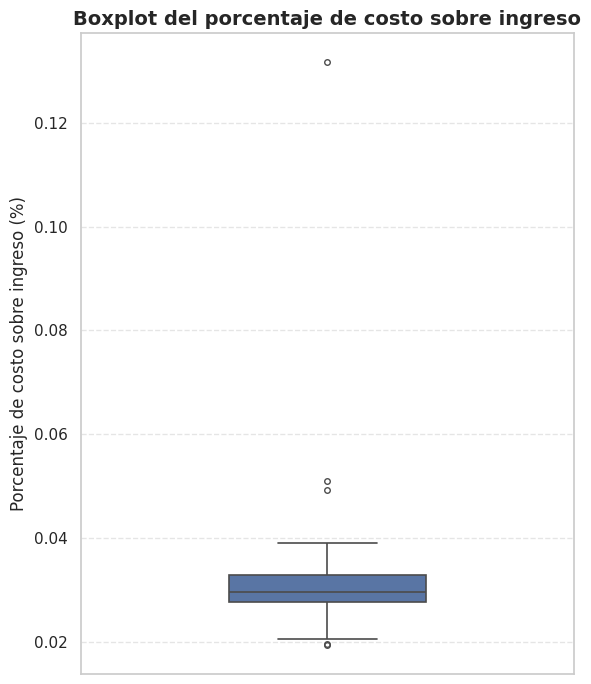

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 7))
sns.boxplot(
    y=merged_df['porcentaje_costo_sobre_ingreso'],
    width=0.4,
    fliersize=4,
    linewidth=1.2
)

plt.title(
    'Boxplot del porcentaje de costo sobre ingreso',
    fontsize=14,
    weight='bold'
)
plt.ylabel('Porcentaje de costo sobre ingreso (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

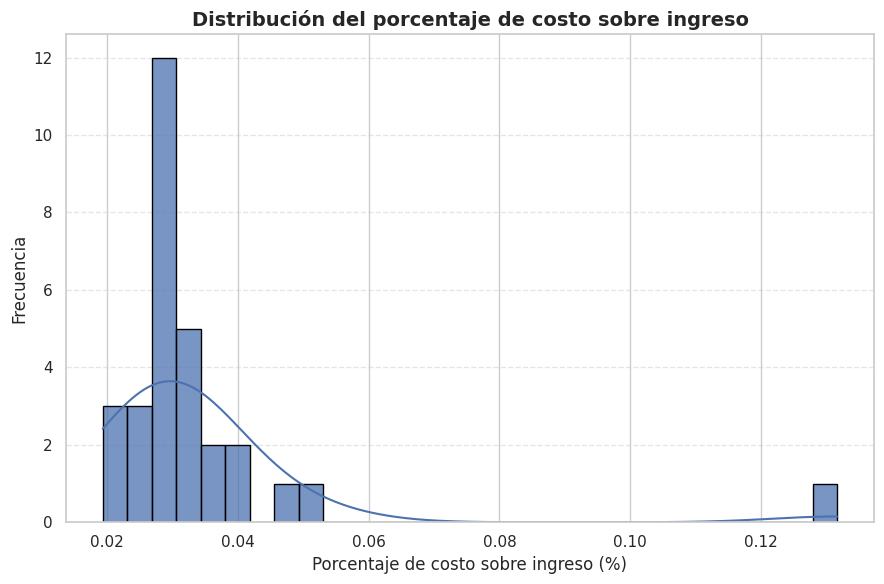

In [208]:
# HISTOGRAMA
# Muestra la distribución

plt.figure(figsize=(9, 6))
sns.histplot(
    merged_df['porcentaje_costo_sobre_ingreso'],
    kde=True,
    bins=30,
    edgecolor='black',
    alpha=0.75
)

plt.title('Distribución del porcentaje de costo sobre ingreso', fontsize=14, weight='bold')
plt.xlabel('Porcentaje de costo sobre ingreso (%)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

---
# ETAPA 3
---




## 3.1. Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.

In [209]:
#Calculo de las medias, medias, moda, rango, varianza y std

media      = df['ingreso_total'].mean()
mediana    = df['ingreso_total'].median()
moda       = df['ingreso_total'].mode()
rango      = df['ingreso_total'].max() - df['ingreso_total'].min()
varianza   = df['ingreso_total'].var(ddof=1)
desviacion = df['ingreso_total'].std(ddof=1)

print("\n" + "="*60)
print("📊 Estadísticas descriptiva — Ingreso Total")
print("="*60)
print(f"{'Media:':30s} {media:>15,.2f}")
print(f"{'Mediana:':30s} {mediana:>15,.2f}")
#print(f"{'Moda:':30s} {moda:>15,.2f}")
print(f"{'Desviación estándar:':30s} {desviacion:>15,.2f}")
print(f"{'Varianza:':30s} {varianza:>15,.2f}")
print("="*60 + "\n")


📊 Estadísticas descriptiva — Ingreso Total
Media:                               48,903.12
Mediana:                             48,140.24
Desviación estándar:                 13,265.56
Varianza:                       175,975,127.63



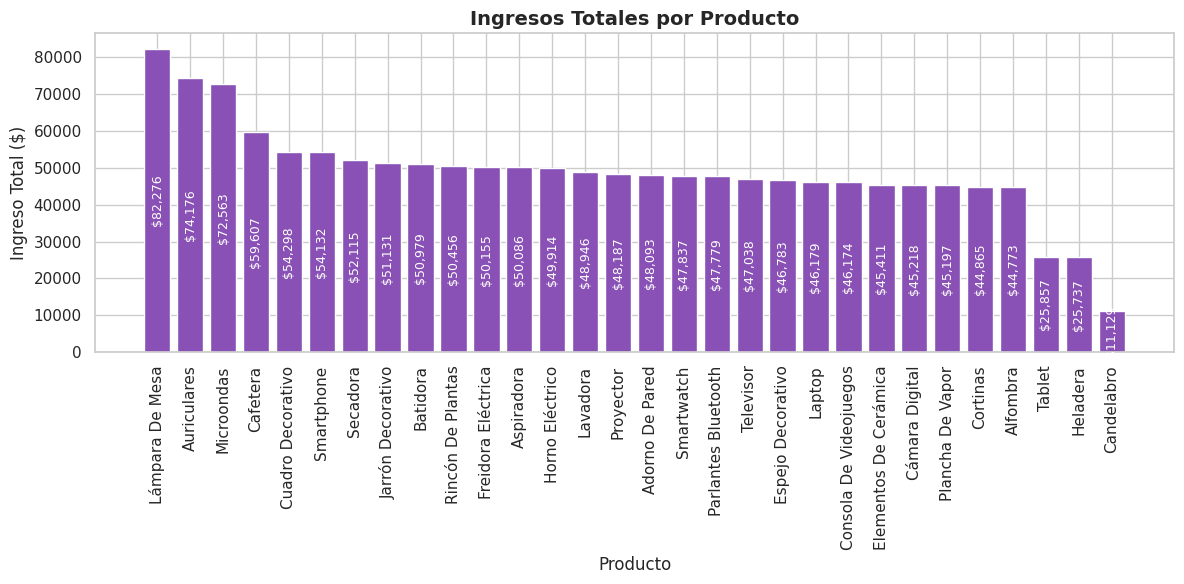

In [210]:

df = resumen_prod.copy()
# =========================================
# 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# =========================================

import matplotlib.pyplot as plt

# Ordenar las barras permite que se muestren ordenadas por el monto de ventas
df_ordenado = df.sort_values("ingreso_total", ascending=False)

plt.figure(figsize=(12, 6))
color_violeta = "#8950B5"
barras = plt.bar(df_ordenado["producto"], df_ordenado["ingreso_total"], color=color_violeta)
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")
plt.xlabel("Producto", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=9,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajusta los bordes y muestra el grafico
plt.tight_layout()
plt.show()

In [211]:
# Estadisticas con quartiles

q1  = df['ingreso_total'].quantile(0.25)
q2  = df['ingreso_total'].quantile(0.50)
q3  = df['ingreso_total'].quantile(0.75)
iqr = q3 - q1

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df[(df['ingreso_total'] < lim_inf) | (df['ingreso_total'] > lim_sup)]

print("\n" + "="*60)
print("📊 Cuartiles, IQR y detección de outliers — Ingreso Total")
print("="*60)
print(f"{'Q1 (25%):':30s} {q1:>15,.2f}")
print(f"{'Mediana (Q2, 50%):':30s} {q2:>15,.2f}")
print(f"{'Q3 (75%):':30s} {q3:>15,.2f}")
print(f"{'Rango intercuartílico (IQR):':30s} {iqr:>15,.2f}")
print("-"*60)
print(f"{'Límite inferior (Tukey):':30s} {lim_inf:>15,.2f}")
print(f"{'Límite superior (Tukey):':30s} {lim_sup:>15,.2f}")
print("-"*60)
print(f"{'Cantidad de outliers:':30s} {len(outliers):>15d}")
print("="*60 + "\n")



📊 Cuartiles, IQR y detección de outliers — Ingreso Total
Q1 (25%):                            45,601.92
Mediana (Q2, 50%):                   48,140.24
Q3 (75%):                            51,092.96
Rango intercuartílico (IQR):          5,491.04
------------------------------------------------------------
Límite inferior (Tukey):             37,365.36
Límite superior (Tukey):             59,329.52
------------------------------------------------------------
Cantidad de outliers:                        7



## 3.2. Análisis Exploratorio de Datos (EDA): Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.


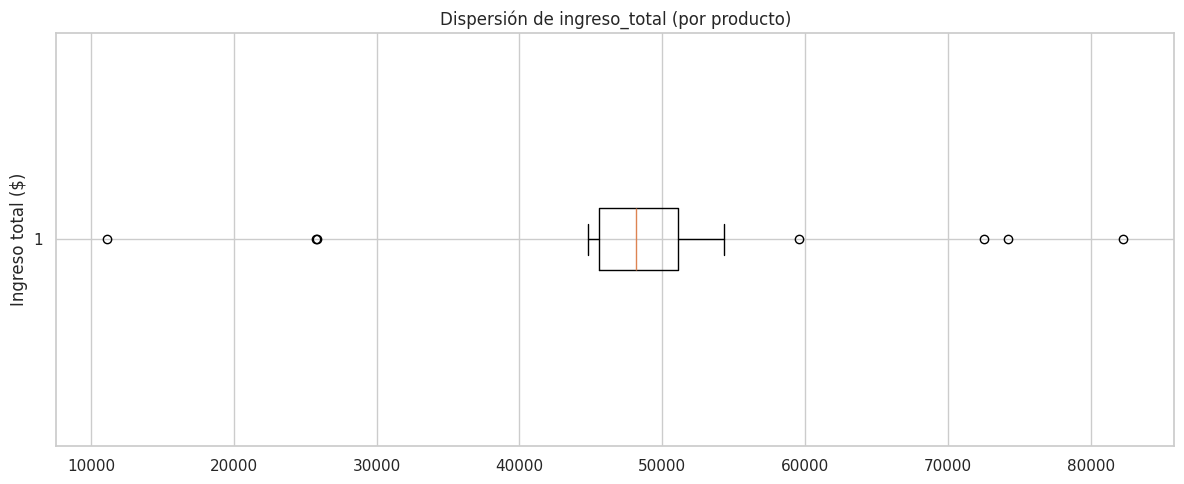

In [212]:
# =========================================
# 📦 Boxplot: dispersión de ingreso_total (por producto)
# =========================================

import matplotlib.pyplot as plt  # importamos matplotlib

vals = resumen_prod['ingreso_total'].dropna()  # tomamos valores numéricos y quitamos NaN

plt.figure(figsize=(12, 5))                     # tamaño del gráfico
plt.boxplot(vals, vert=False)                   # dibujamos boxplot vertical
plt.title('Dispersión de ingreso_total (por producto)')  # título
plt.ylabel('Ingreso total ($)')                # etiqueta del eje Y
plt.tight_layout()                              # ajustar márgenes
plt.show()

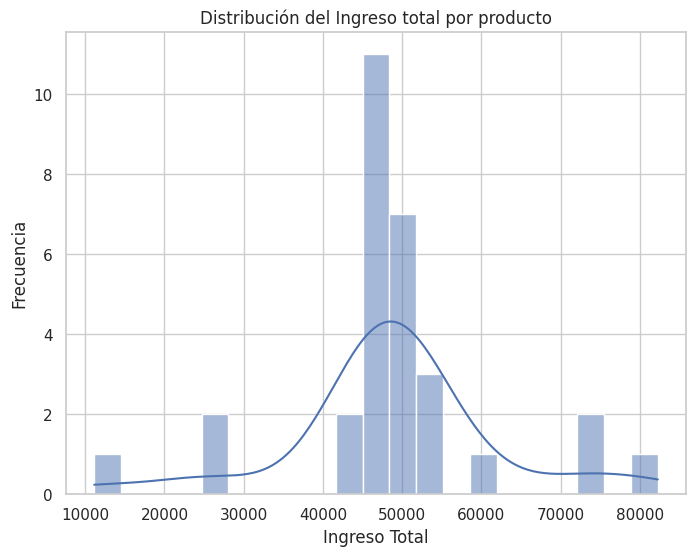

In [213]:
# Histogram to see the distribution
plt.figure(figsize=(8, 6))
sns.histplot(vals, kde=True)
plt.title('Distribución del Ingreso total por producto')
plt.xlabel('Ingreso Total')
plt.ylabel('Frecuencia')
plt.show()

## 3.3. Correlación: Evaluar la relación entre diferentes variables (por ejemplo, precio y cantidad vendida) y mostrar los resultados en un gráfico.

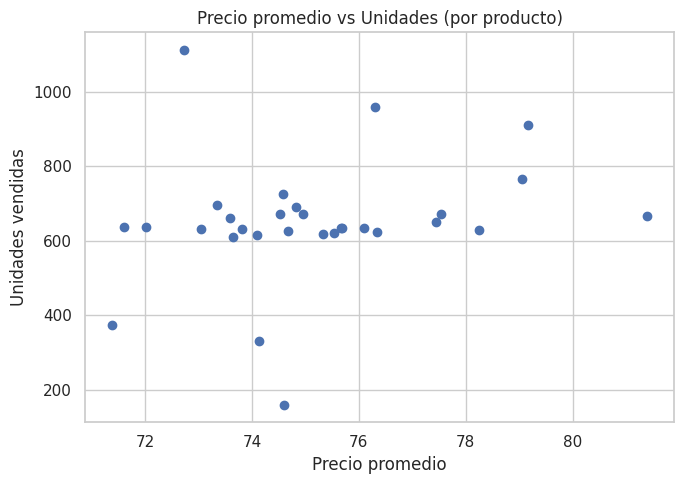

In [214]:
# =========================================
# 🔵 Dispersión: precio_promedio vs unidades (por producto)
# =========================================

import matplotlib.pyplot as plt  # importamos matplotlib

x = resumen_prod['precio_promedio']  # eje X: precio promedio por producto
y = resumen_prod['unidades']         # eje Y: unidades vendidas por producto

plt.figure(figsize=(7, 5))           # tamaño del gráfico
plt.scatter(x, y)                    # gráfico de puntos
plt.title('Precio promedio vs Unidades (por producto)')  # título
plt.xlabel('Precio promedio')        # etiqueta eje X
plt.ylabel('Unidades vendidas')      # etiqueta eje Y
plt.tight_layout()                   # ajustar márgenes
plt.show()                           # mostrar


In [215]:
# =========================================
# 📌 Coeficiente de correlación (precio_promedio vs unidades)
# =========================================

# Calculamos el coeficiente de correlación de Pearson con pandas (método corr)
corr_val = resumen_prod[['precio_promedio','unidades']].corr().loc['precio_promedio','unidades']

print(f"Coeficiente de correlación (Pearson): {corr_val:.3f}")
# Interpretación simple:
if corr_val > 0.8:
    print("Interpretación: relación positiva clara (a mayor precio_promedio, suelen venderse más unidades).")
elif corr_val > 0.2:
    print("Interpretación: relación positiva débil a moderada.")
elif corr_val < -0.8:
    print("Interpretación: relación negativa clara (a mayor precio_promedio, suelen venderse menos unidades).")
elif corr_val < -0.3:
    print("Interpretación: relación negativa débil a moderada.")
else:
    print("Interpretación: relación muy débil o nula.")

Coeficiente de correlación (Pearson): 0.217
Interpretación: relación positiva débil a moderada.


---
# ETAPA 4
---



## 4.1. Visualización con Matplotlib: Crear gráficos básicos (líneas, barras, dispersión)




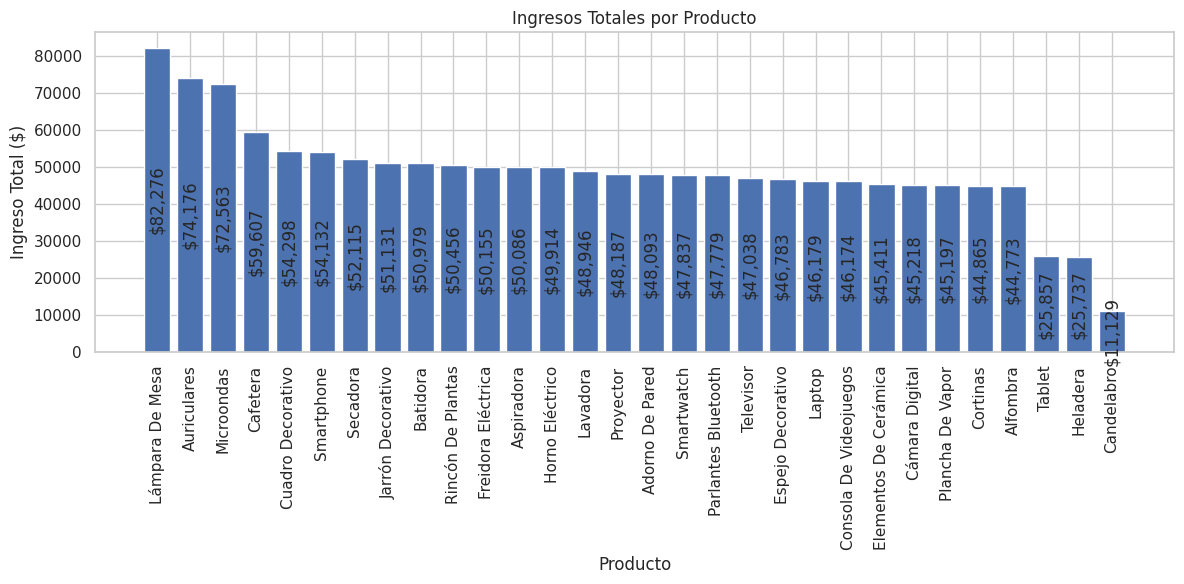

In [216]:
# =========================================
# 📊 Barras: ingresos por producto (Matplotlib, comentado línea por línea)
# =========================================

import matplotlib.pyplot as plt  # importamos la librería de gráficos

df = resumen_prod.copy()                                # copiamos para no modificar el original
df_ordenado = df.sort_values('ingreso_total', ascending=False)  # ordenamos desc por ingreso

plt.figure(figsize=(12, 6))                             # tamaño del gráfico
barras = plt.bar(df_ordenado['producto'], df_ordenado['ingreso_total'])  # dibujamos las barras

plt.title('Ingresos Totales por Producto')              # título del gráfico
plt.xlabel('Producto')                                  # etiqueta eje X
plt.ylabel('Ingreso Total ($)')                         # etiqueta eje Y
plt.xticks(rotation=90)                                  # rotamos etiquetas del eje X para legibilidad

# Etiquetamos el valor dentro de cada barra (texto vertical)
for b in barras:
    h = b.get_height()                                  # altura de la barra (valor)
    x_c = b.get_x() + b.get_width()/2                   # centro horizontal de la barra
    plt.text(x_c, h/2, f"${h:,.0f}", ha='center', va='center', rotation=90)  # texto dentro, vertical

plt.tight_layout()                                      # ajustar márgenes
plt.show()                                              # mostrar gráfico

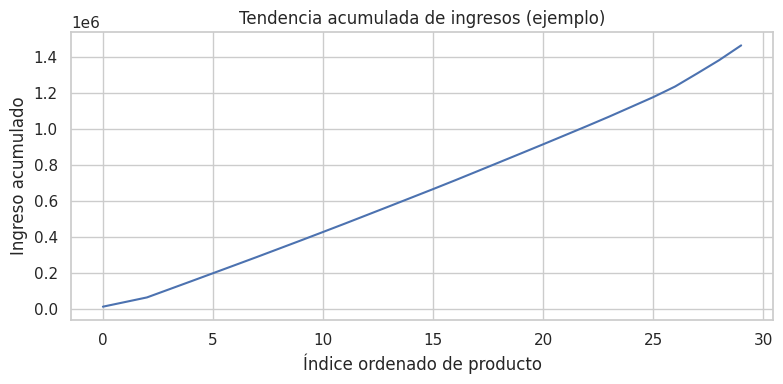

In [217]:

# =========================================
# 📉 Líneas: ejemplo simple de tendencia acumulada
# =========================================


import matplotlib.pyplot as plt
import numpy as np

valores = resumen_prod['ingreso_total'].sort_values().values  # tomamos ingresos ordenados
acum = np.cumsum(valores)                                     # acumulado simple (ejemplo)

plt.figure(figsize=(8, 4))   # tamaño del gráfico
plt.plot(acum)               # línea simple
plt.title('Tendencia acumulada de ingresos (ejemplo)')
plt.xlabel('Índice ordenado de producto')
plt.ylabel('Ingreso acumulado')
plt.tight_layout()
plt.show()

In [218]:

# Agrupamos las ventas por fecha y sumamos los ingresos de cada día
# Convertimos la columna 'fecha_venta' a tipo datetime (por seguridad)
ventas_perf['fecha_venta'] = pd.to_datetime(ventas_perf['fecha_venta'], errors='coerce')
ingresos_por_dia = ventas_perf.groupby('fecha_venta')['ingreso'].sum().sort_index()
print(ingresos_por_dia.head(160))

ingresos_acumulados = ingresos_por_dia.cumsum()
print(ingresos_acumulados)

fecha_venta
2024-01-02    3751.26
2024-01-03    3601.84
2024-01-04    5241.78
2024-01-05    4758.53
2024-01-06     2899.6
               ...   
2024-06-05    3357.26
2024-06-06    4107.55
2024-06-07    2389.56
2024-06-08    6433.07
2024-06-09    2260.46
Name: ingreso, Length: 160, dtype: Float64
fecha_venta
2024-01-02       3751.26
2024-01-03        7353.1
2024-01-04      12594.88
2024-01-05      17353.41
2024-01-06      20253.01
                 ...    
2024-12-26    1451156.47
2024-12-27    1453820.73
2024-12-28    1457006.58
2024-12-29    1461227.29
2024-12-30    1467093.52
Name: ingreso, Length: 364, dtype: Float64


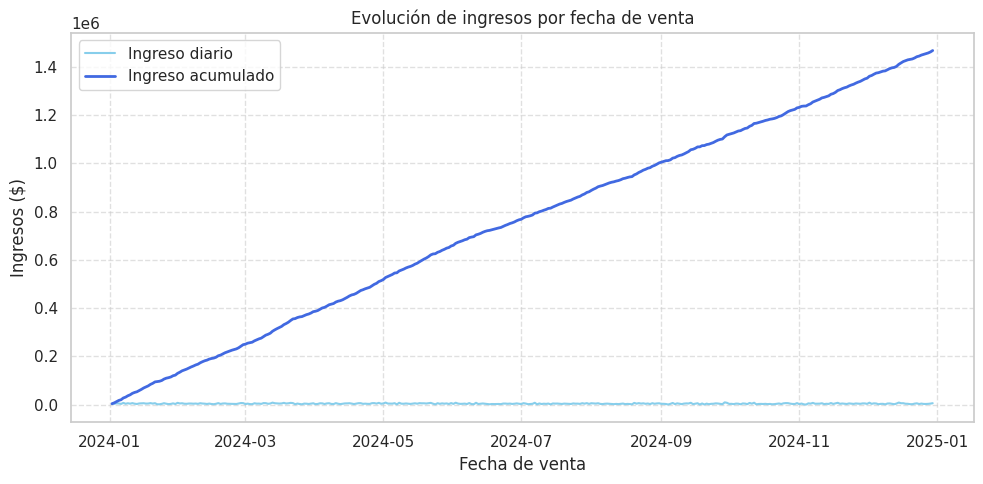

In [219]:
# =========================================
# 📉 Tendencia real de ingresos a lo largo del tiempo
# =========================================
# Usamos el dataset 'ventas_perf', que contiene la fecha y el ingreso de cada registro.

import matplotlib.pyplot as plt
import pandas as pd

# Convertimos la columna 'fecha_venta' a tipo datetime (por seguridad)
ventas_perf['fecha_venta'] = pd.to_datetime(ventas_perf['fecha_venta'], errors='coerce')

# Agrupamos las ventas por fecha y sumamos los ingresos de cada día
ingresos_por_dia = ventas_perf.groupby('fecha_venta')['ingreso'].sum().sort_index()

# Calculamos el acumulado de ingresos
ingresos_acumulados = ingresos_por_dia.cumsum()

# Graficamos ambas curvas: ingresos diarios y acumulados
plt.figure(figsize=(10,5))

# Línea 1: ingresos diarios
plt.plot(ingresos_por_dia, color='skyblue', label='Ingreso diario')

# Línea 2: ingresos acumulados
plt.plot(ingresos_acumulados, color='royalblue', label='Ingreso acumulado', linewidth=2)

# Personalización del gráfico
plt.title('Evolución de ingresos por fecha de venta')
plt.xlabel('Fecha de venta')
plt.ylabel('Ingresos ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

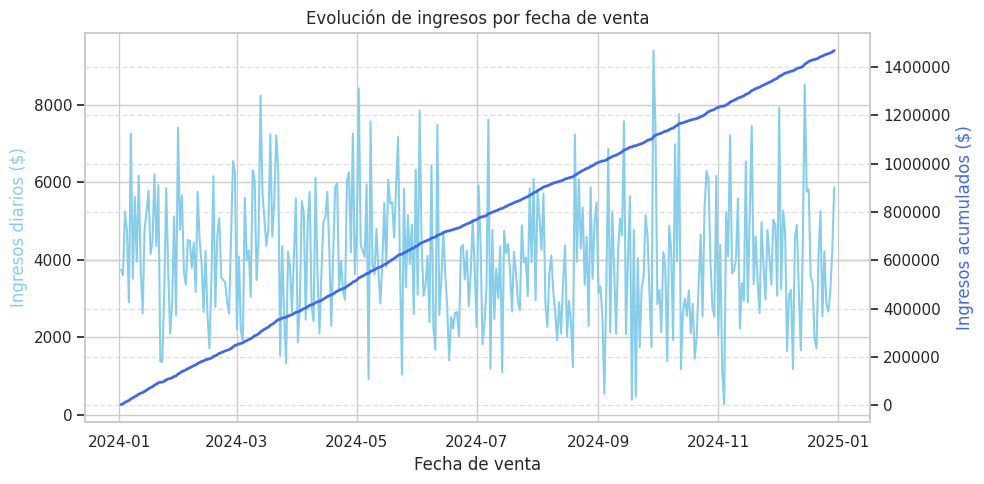

In [220]:
# 📉 Tendencia real de ingresos a lo largo del tiempo
import matplotlib.pyplot as plt
import pandas as pd
fig, ax1 = plt.subplots(figsize=(10, 5))
#eje izquierdo ingresos diarios
ax1.plot(ingresos_por_dia, color='skyblue', label='Ingreso diario')
ax1.set_xlabel('Fecha de venta')
ax1.set_ylabel('Ingresos diarios ($)', color='skyblue')
ax1.ticklabel_format(style='plain', axis= 'y')

#eje derecho que son los ingresos acumulados
ax2 = ax1.twinx()
ax2.plot(ingresos_acumulados, color='royalblue', label='Ingreso acumulado', linewidth=2)
ax2.set_ylabel('Ingresos acumulados ($)', color='royalblue')
ax2.ticklabel_format(style='plain', axis= 'y')
# Personalización del gráfico
plt.title('Evolución de ingresos por fecha de venta')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 4.2. Visualización Avanzada con Seaborn: Desarrollar visualizaciones estadísticas avanzadas, utilizando paletas y estilos para mejorar la presentación.


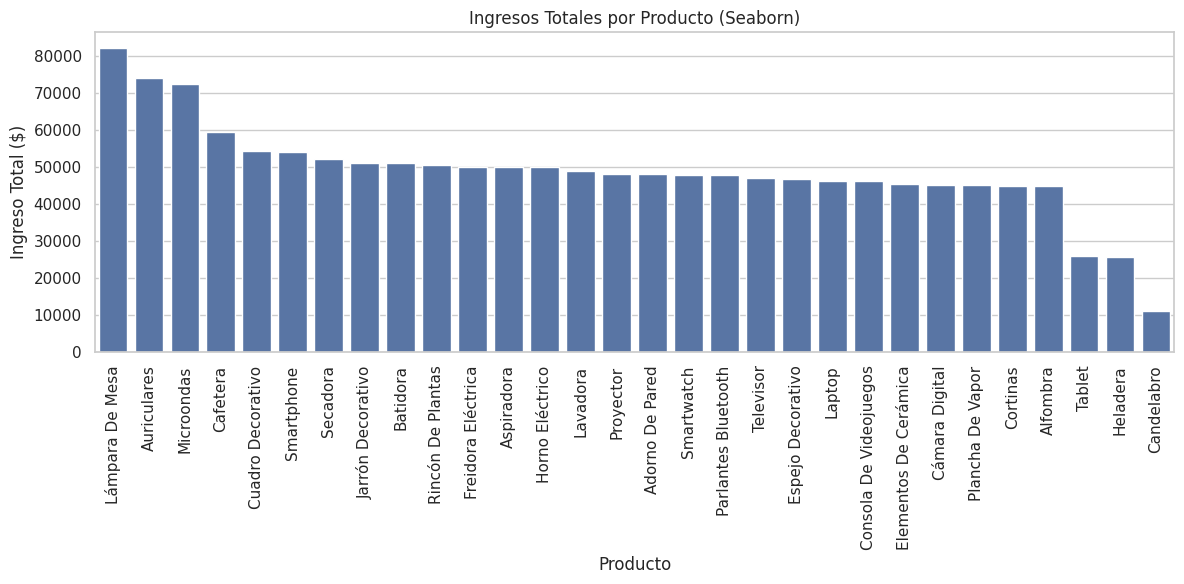

In [221]:

# =========================================
# 🌈 Seaborn: barras ordenadas y boxplot por categoría
# =========================================

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")      # estilo claro por defecto

# Barras ordenadas (Seaborn)
df = resumen_prod.sort_values('ingreso_total', ascending=False)  # ordenamos
plt.figure(figsize=(12, 6))                                      # tamaño
ax = sns.barplot(data=df, x='producto', y='ingreso_total')       # barras
ax.set_title('Ingresos Totales por Producto (Seaborn)')          # título
ax.set_xlabel('Producto'); ax.set_ylabel('Ingreso Total ($)')    # etiquetas
plt.xticks(rotation=90)                                          # rotamos etiquetas
plt.tight_layout(); plt.show()

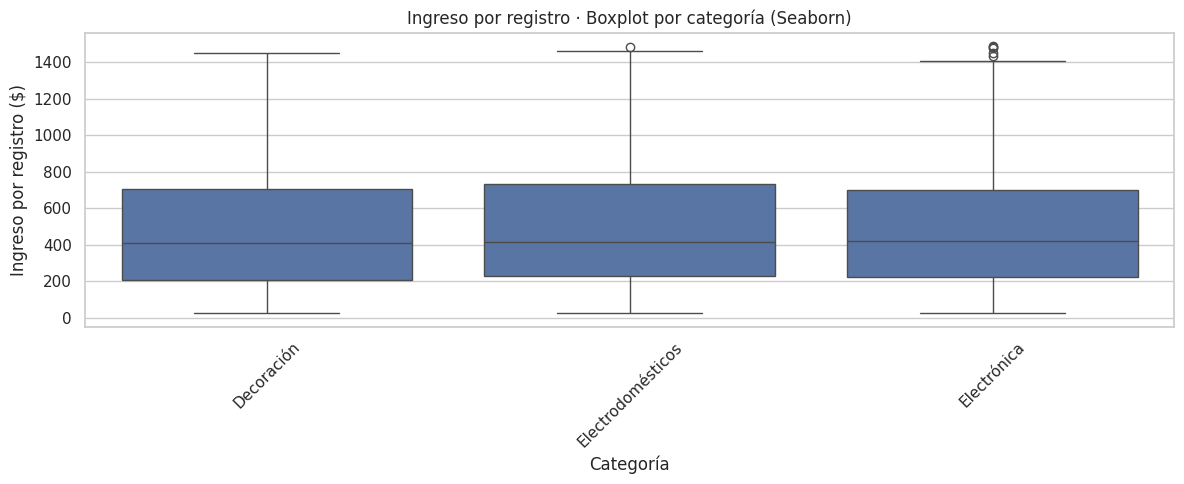

In [222]:
# Boxplot por categoría (ingreso por registro)
plt.figure(figsize=(12, 5))                                      # tamaño
ax = sns.boxplot(data=ventas_perf, x='categoria', y='ingreso')   # boxplot
ax.set_title('Ingreso por registro · Boxplot por categoría (Seaborn)')  # título
ax.set_xlabel('Categoría'); ax.set_ylabel('Ingreso por registro ($)')   # etiquetas
plt.xticks(rotation=45)                                          # rotamos etiquetas
plt.tight_layout(); plt.show()


## 4.4. Presentación Final: Preparar una presentación que resuma los hallazgos, insights y visualizaciones generadas a lo largo del proyecto.